# Linear Target; Variable Amount of Noise

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & = 4; \\
s & = 0; \\
Z & = N(0, \sigma^2).
\end{align}
$$


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M = 4

In [4]:
S = 0

In [5]:
FEATURE_DISTRIBUTION = "normal"

In [6]:
SIGMA = np.arange(0.0, 101.0, 20.0)

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [7]:
experiment0 = ise.LinearWithNoiseExperiment(
    m=M, s=S, sigma=SIGMA[1], n=N, feature_distribution=FEATURE_DISTRIBUTION
)

### Generate Impact Charts

In [8]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


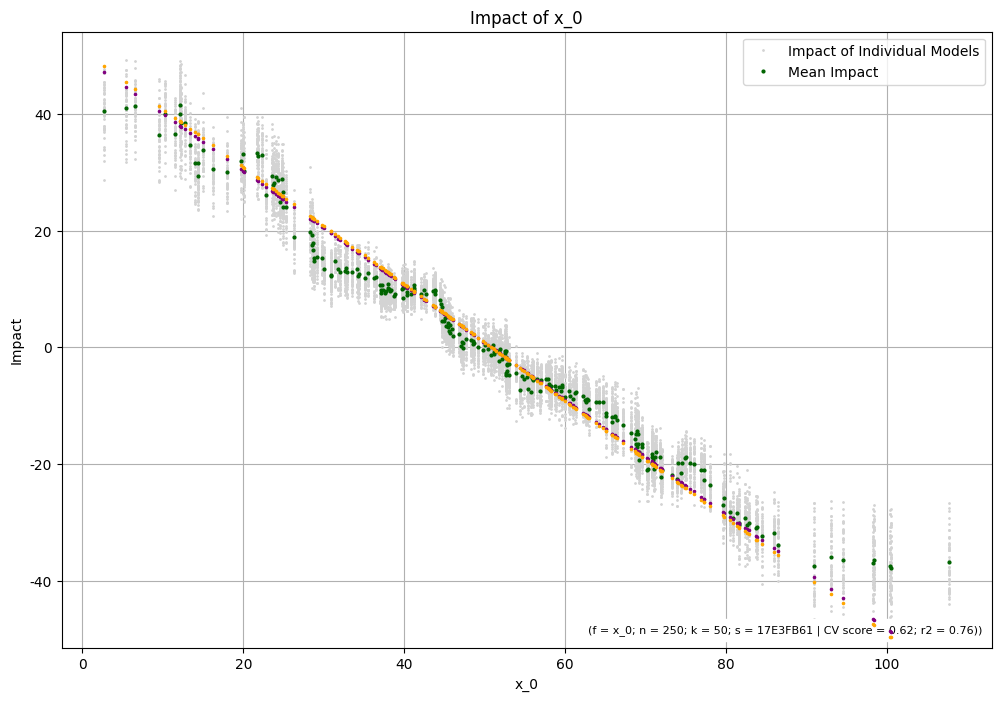

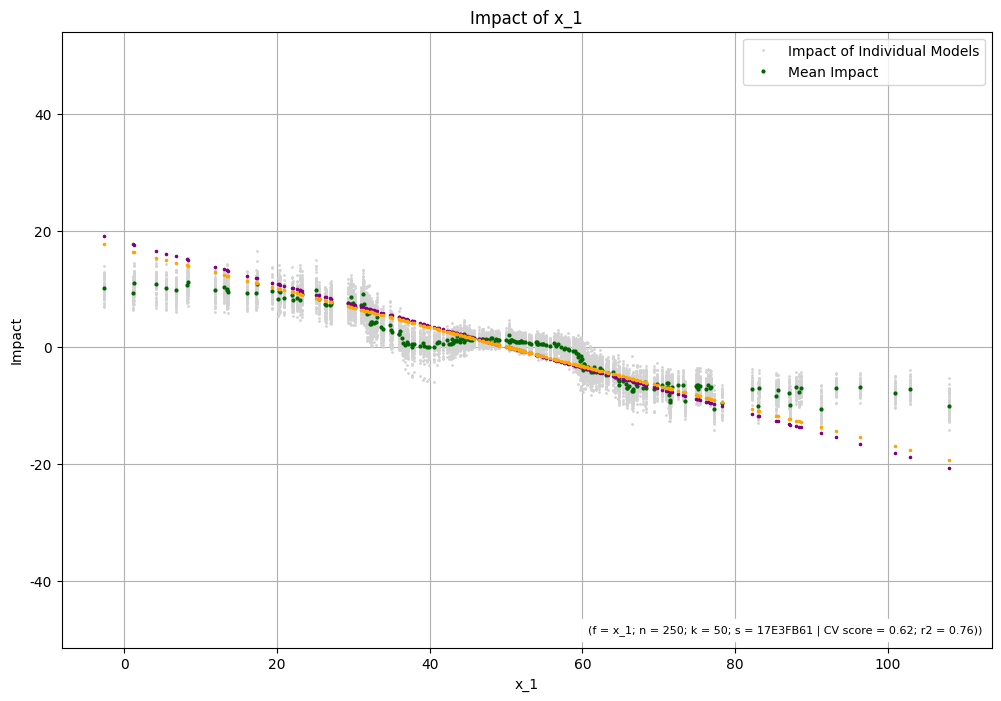

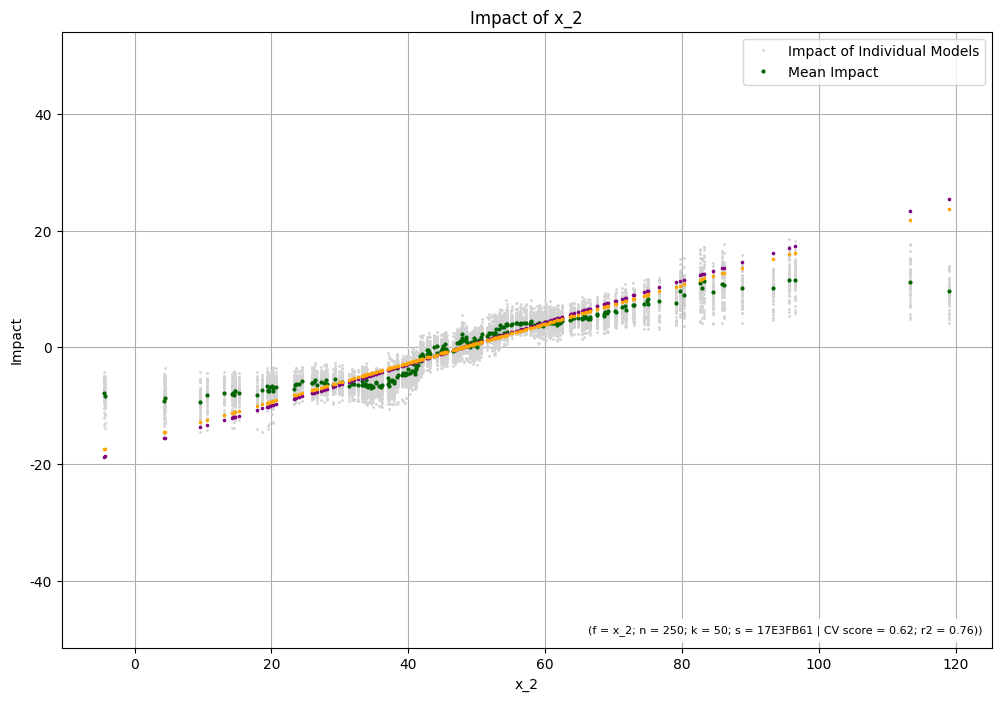

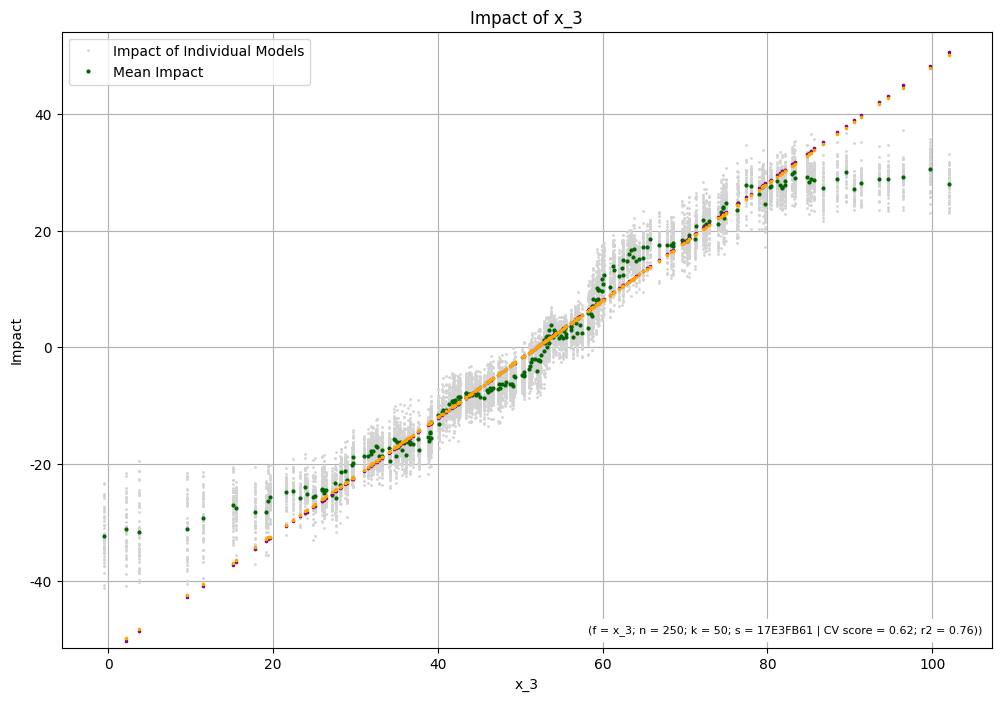

In [9]:
impact_charts = scenario.model_impact_charts(linreg_overlay=True)

### Generate Metrics

In [10]:
scenario.model_errors(linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,avg,mu_x_i
0,RMSE,3.499262,2.387852,2.141679,4.214462,3.060814,3.060814
0,MAE,2.630777,1.718705,1.446869,2.535998,2.083087,2.083087
0,MED_AE,2.211633,1.394844,1.135691,1.586155,1.582081,1.582081
0,LR_RMSE,0.411752,0.506726,0.453689,0.173642,0.386452,0.386452
0,LR_MAE,0.334352,0.402740,0.348960,0.138356,0.306102,0.306102
0,LR_MED_AE,0.292116,0.343132,0.283752,0.114336,0.258334,0.258334


In [11]:
scenario.linreg_r2(), scenario.model_r2()

(0.693825202367874, 0.76456502017374)

## A Multi-Scenario Experiment

In [12]:
experiment = ise.LinearWithNoiseExperiment(
    m=M, s=S, sigma=SIGMA, n=N, feature_distribution=FEATURE_DISTRIBUTION
)

In [13]:
df_model_errors = experiment.model_errors(linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [14]:
df_model_errors

,metric,x_0,x_1,x_2,x_3,avg,mu_x_i,m,s,sigma,IM_R2,LR_R2
0,RMSE,1.900351e+00,2.004767e+00,1.692300e+00,2.081935e+00,1.919838e+00,1.919838e+00,4,0,0.0,0.996669,1.000000
0,MAE,1.231742e+00,1.340821e+00,1.087661e+00,1.273455e+00,1.233420e+00,1.233420e+00,4,0,0.0,0.996669,1.000000
0,MED_AE,8.285428e-01,9.120034e-01,8.299961e-01,8.015718e-01,8.430285e-01,8.430285e-01,4,0,0.0,0.996669,1.000000
0,LR_RMSE,1.728678e-14,1.214860e-14,7.888804e-15,6.621309e-15,1.098637e-14,1.098637e-14,4,0,0.0,0.996669,1.000000
0,LR_MAE,1.496431e-14,1.009164e-14,7.245822e-15,5.162093e-15,9.365966e-15,9.365966e-15,4,0,0.0,0.996669,1.000000
0,LR_MED_AE,1.154632e-14,1.021405e-14,7.105427e-15,3.552714e-15,8.104628e-15,8.104628e-15,4,0,0.0,0.996669,1.000000
0,RMSE,3.499262e+00,2.387852e+00,2.141679e+00,4.214462e+00,3.060814e+00,3.060814e+00,4,0,20.0,0.764565,0.693825
0,MAE,2.630777e+00,1.718705e+00,1.446869e+00,2.535998e+00,2.083087e+00,2.083087e+00,4,0,20.0,0.764565,0.693825
0,MED_AE,2.211633e+00,1.394844e+00,1.135691e+00,1.586155e+00,1.582081e+00,1.582081e+00,4,0,20.0,0.764565,0.693825
0,LR_RMSE,4.117519e-01,5.067264e-01,4.536889e-01,1.736416e-01,3.864522e-01,3.864522e-01,4,0,20.0,0.764565,0.693825


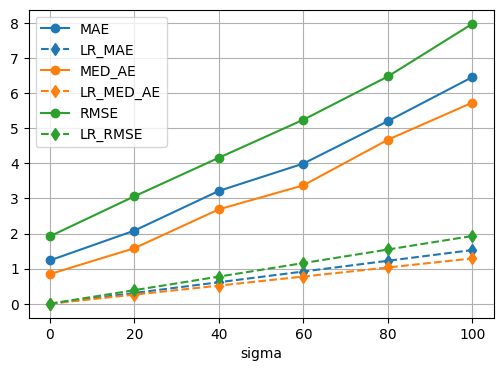

In [19]:
ax = experiment.plot_model_errors(x_col="sigma", y_col="mu_x_i", figsize=(6, 4))

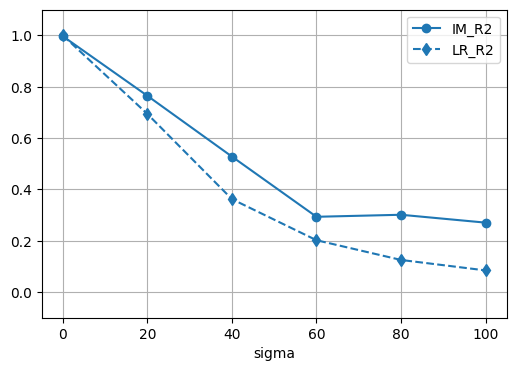

In [16]:
ax = experiment.plot_r2(x_col="sigma", figsize=(6, 4))